In [5]:
import pandas as pd
board_games = pd.read_csv("board_games.csv")
board_games = board_games.dropna()
board_games = board_games[board_games['users_rated']>0]
board_games.head(5)

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


6.01611284933
1.57882993483


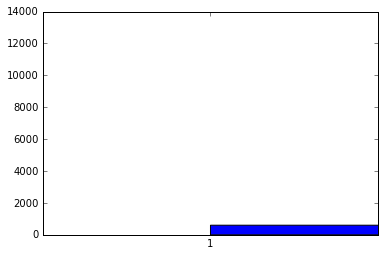

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(board_games["average_rating"])
plt.boxplot(board_games["average_rating"])
print(board_games["average_rating"].mean())
print(board_games["average_rating"].std())


In [7]:
import sklearn
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=5)
columns = list(board_games.columns)
columns.remove('name')
columns.remove('type')
columns.remove('id')
numeric_df = board_games[columns]

kmeans_model.fit(numeric_df)


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [8]:
import numpy as np
labels = kmeans_model.labels_
game_mean = numeric_df.apply(np.mean,axis=1)
game_std = numeric_df.apply(np.std,axis =1)

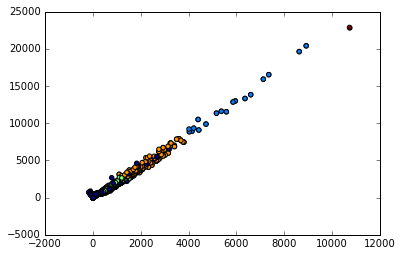

In [9]:
plt.scatter(game_mean,game_std,c=labels)

In [10]:
correlations=numeric_df.corr()
print(correlations["average_rating"])

yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64


In [11]:
columns.remove("average_rating")
columns.remove("bayes_average_rating")

In [12]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(board_games[columns],board_games["average_rating"])
predictions = reg.predict(board_games[columns])


In [13]:
np.mean((predictions - board_games["average_rating"]) ** 2)

2.0933969758339361